World Gender Values: 
-
How pov's regarding women reflect in laws/legislations/violence/crime?
====

In [ ]:
!#pip install pandas
!#pip install pyreadstat
!#pip install numpy
!#pip install scipy
!#pip install matplotlib
!#pip install seaborn

In [4]:
#Libary
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

dfWVS from: https://www.worldvaluessurvey.org/WVSEVStrend.jsp
file: SPSS: WVS_Trend_1981_2022_v3.0 SPSS


In [6]:
#load wsv data
dfWVS = pd.read_spss("..//data//WVS_trends_3_0.sav")  

In [7]:
#load HDR21
hdr21 = pd.read_csv("..//data//HDR21-22_Composite_indices_complete_time_series.csv")

Gender related questions since WVS3:
- C001 "Jobs scarce: Men should have more right to a job than women (3 categories)" 
- D057 "Being a housewife just as fulfilling" 
- D059 "Men make better political leaders than women do" 
- D060 "University is more important for a boy than for a girl" 
- E069_15 "Confidence: The Women´s Movement"

Indirect related questions since wvs3:
- D054 "One of main goals in life has been to make my parents proud"
- F063 "How important is God in your life"
- F119 "Justifiable: Prostitution"
- F120 "Justifiable: Abortion"
- F121 "Justifiable: Divorce"
- E035 "Income equality" (where sex is female)
- A173 "How much freedom of choice and control" (where sex is female)
- A003 "Important in life: Leisure time" (gap in sex)
- A008 "Feeling of happiness" (gap in sex)

Demographic questions since wvs3:
- G016	Language at home
- X001	Sex
- X002	Year of birth
- X003	Age
- X007	Marital status
- X011	How many children do you have
- X025CSWVS	Education (country specific) WVS
- X028	Employment status
- X040	Are you the chief wage earner in your house
- X044	Family savings during past year
- X045	Social class (subjective)
- X047_WVS	Subjective income level (10 categories) (WVS)
- X047R_WVS	Income level (3 categories) WVS
- X048ISO	Region where the interview was conducted (ISO)
- X048WVS	Region where the interview was conducted (WVS)
- X049	Size of town (8 categories)
- X049a	Size of town where interview was conducted (5 categories)
- X051	Ethnic group

Observed countrie codes:
- Germany(not wvs4)
- China
- Turkey/Pakistan(not 5)/Iran(since wvs4, not 6)
- South Africa(not 7)/Nigeria(not 5)
- Brazil(not wvs4)/Peru

Waves (S002/versn_w):
- '2017-2022'/'WVS7'
- '2010-2014'/'WVS6'
- '2005-2009'/'WVS5'
- '1999-2004'/'WVS4'
- '1994-1998'/'WVS3'
- '1989-1993'/'WVS2'
- '1981-1984'/'WVS1'



In [8]:
availability = pd.DataFrame(columns=['country', 'WVS3','WVS4','WVS5','WVS6','WVS7'])

for idCountry,country in enumerate(dfWVS.S003.unique()):
    availability.loc[len(availability)]=[country, 
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS3') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS4') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS5') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS6') & (dfWVS.S003==country)])>0 else ''),
                         ('x' if len(dfWVS[(dfWVS.versn_w=='WVS7') & (dfWVS.S003==country)])>0 else '')   
                        ]
                     
#availability.sort_values(by=['country'], inplace=True)()

In [9]:
print(availability.to_string())

                 country WVS3 WVS4 WVS5 WVS6 WVS7
0                Andorra              x         x
1              Argentina    x    x    x    x    x
2              Australia    x         x    x    x
3             Bangladesh    x    x              x
4                Armenia    x              x    x
5                Bolivia                        x
6                 Brazil    x         x    x    x
7                Albania    x    x               
8                Myanmar                        x
9                Algeria         x         x     
10                Canada         x    x         x
11                 Chile    x    x    x    x    x
12                 China    x    x    x    x    x
13            Taiwan ROC    x         x    x    x
14              Colombia    x         x    x    x
15                Cyprus              x    x    x
16               Czechia    x                   x
17               Ecuador                   x    x
18              Ethiopia              x         x


In [ ]:
print(availability[(availability.WVS3='x')&(availability.WVS4='x')&(availability.WVS5=='x')&(availability.WVS6=='x')&(availability.WVS7=='x')].to_string())

In [ ]:
availability[(availability.country.isin([]))]

In [ ]:
dfWVS[(dfWVS.S003=='Yemen')].versn_w.unique()

In [10]:
#examples filtering
listCountries = ['Germany','China','Turkey','Nigeria','Peru']
listWaves = ['WVS3','WVS4','WVS5','WVS6','WVS7']

dfWVSFilterd = dfWVS[(dfWVS.versn_w.isin(listWaves)) & (dfWVS.S003.isin(listCountries))]

listGenderQuestions = ['C001', 'D059', 'D060', 'E069_15', 'F120', 'F121', 'E035', 'A173']
listDemographicQuestions = ['X001', 'X003', 'X051', 'X007', 'X040', 'X049']
listIDColummns = ['versn_w', 'S002', 'S003', 'S007', 'S020']

dfWVSFilterd = dfWVSFilterd[listIDColummns+listDemographicQuestions+listGenderQuestions]

#rename columns
mapColumns = {'C001': 'job', 'D059': 'politician', 'D060': 'university', 'E069_15': 'women_movement', 'F120': 'abortion', 
              'F121': 'divorce', 'E035': 'income_equality', 'A173': 'choice_control', 
              'X001': 'sex', 'X003': 'age', 'X051': 'ethnic', 'X007': 'status', 'X040': 'top_earner', 'X049': 'town_size', 
              'versn_w': 'wave', 'S002': 'wave_years', 'S003': 'country', 'S007': 'respondent_number', 'S020': 'year'}
dfWVSFilterd = dfWVSFilterd.rename(columns=mapColumns)
listGenderQuestions=[mapColumns.get(n, n) for n in listGenderQuestions]
listDemographicQuestions=[mapColumns.get(n, n) for n in listDemographicQuestions]
listIDColummns=[mapColumns.get(n, n) for n in listIDColummns]

In [20]:
dfWVSFilterd['university'].unique()


['Disagree', 'Strongly disagree', 'Agree', 'Agree strongly', NaN]
Categories (4, object): ['Agree', 'Agree strongly', 'Disagree', 'Strongly disagree']

<Axes: ylabel='count'>

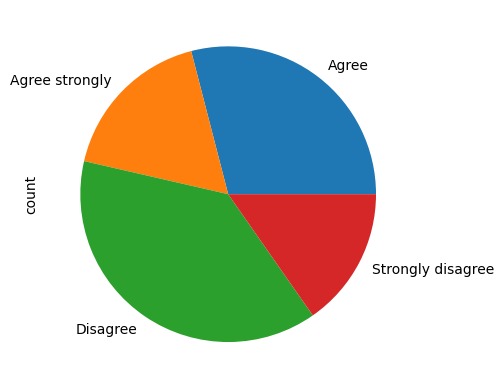

In [32]:
dfQuerry=dfWVSFilterd[(dfWVSFilterd.country=='Nigeria')&(dfWVSFilterd.wave=="WVS7")]
dfWVSFilterd['politician'].value_counts().sort_index().plot(kind='pie')# labels=['Always justifiable','2','3','4','5','6','7','8','9','Never justifiable'])

In [ ]:
#dfCOl = dfWVS[dfWVS.A173 not in ['1','2','3','4','5','6','7','8','9']] 
#dfWVS['A173'].unique().sort_values()

Filter data.
Replace text answers with numerical counterparts from questionaire

In [21]:
print(listGenderQuestions)

# replace text answers with numeric ones, according F00011424-Common_EVS_WVS_Dictionary_IVS

# Please tell me for each of the following actions whether you think it is:
dfWVSFilterd['divorce'] = dfWVSFilterd['divorce'].replace("Never justifiable", 1)
dfWVSFilterd['divorce'] = dfWVSFilterd['divorce'].replace("Always justifiable", 10)

dfWVSFilterd['abortion'] = dfWVSFilterd['abortion'].replace("Never justifiable", 1)
dfWVSFilterd['abortion'] = dfWVSFilterd['abortion'].replace("Always justifiable", 10)


# how much confidence do you have in womens movement:
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace("A great deal", 1)
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace("Quite a lot", 2)
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace("Not very much", 3)
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace("None at all", 4)


#On the whole, men make better political leaders than women do ['Agree', 'Disagree', 'Agree strongly', NaN, 'Strongly disagree']
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Strongly agree", 1)
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Agree strongly", 1)
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Agree", 2)
#dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Neither", 3) # jibts net nur 4
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Disagree", 4)
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Disagree strongly", 5) 
dfWVSFilterd['politician'] = dfWVSFilterd['politician'].replace("Strongly disagree", 5) 

# A university education is more important for a boy than for a girl ['Disagree', 'Strongly disagree', 'Agree', 'Agree strongly', NaN]
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Strongly agree", 1)
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Agree strongly", 1)
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Agree", 2)
#dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Neither", 3)
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Disagree", 4)
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Disagree strongly", 5) 
dfWVSFilterd['university'] = dfWVSFilterd['university'].replace("Strongly disagree", 5) 

# When jobs are scarce, men should have more right to a job than women ['Agree', 'Neither', 'Disagree', NaN]
dfWVSFilterd['job'] = dfWVSFilterd['job'].replace("Agree", 1)
dfWVSFilterd['job'] = dfWVSFilterd['job'].replace("Neither", 2)
dfWVSFilterd['job'] = dfWVSFilterd['job'].replace("Disagree", 3)



# Some people feel they have completely free choice and control over their lives, while other people
# feel that what they do has no real effect on what happens to them. 
# Please use this scale where 1 means "no choice at all" and 10 means "a great deal of choice" to indicate 
# how much freedom of choice and control you feel you have over the way your life turns out
dfWVSFilterd['choice_control'] = dfWVSFilterd['choice_control'].replace("No choice at all", 1)
dfWVSFilterd['choice_control'] = dfWVSFilterd['choice_control'].replace("None at all", 1)
dfWVSFilterd['choice_control'] = dfWVSFilterd['choice_control'].replace("A great deal", 10)

# How would you place your views on this scale? 1 means you agree completely with the statement on the left; 
# 10 means you agree completely with the statement on the right
dfWVSFilterd['income_equality'] = dfWVSFilterd['income_equality'].replace("Incomes should be made more equal", 1)
dfWVSFilterd['income_equality'] = dfWVSFilterd['income_equality'].replace("We need larger income differences as incentives", 10)

['job', 'politician', 'university', 'women_movement', 'abortion', 'divorce', 'income_equality', 'choice_control']


Invert some scales to make the results more intuitive.
So for every question the higher the number the more the agreement TOWARDS womens rights/gender equality.

In [22]:
# invert values
dfWVSFilterd['women_movement'] = dfWVSFilterd['women_movement'].replace({1:4, 2:3, 3:2, 4:1})
dfWVSFilterd['income_equality'] = dfWVSFilterd['income_equality'].replace({1:10, 2:9, 3:8, 4:7, 5:6, 6:5, 7:4, 8:3, 9:2, 10:1})


# change values to numbers where possible
# drop rows with NAs 
cols = {'job', 'politician', 'university',  'women_movement', 'abortion', 'divorce', 'income_equality', 'choice_control'}
for col in cols:
    dfWVSFilterd = dfWVSFilterd.dropna(subset=[col])
    dfWVSFilterd[col] = dfWVSFilterd[col].astype(int)


Safe subset of data ease my laptops suffering from the big spss file

In [23]:
# safe data into smaller excel file for easier access/faster coding from here on
dfWVSFilterd.to_csv('your_data_2.csv')


Load new data

In [24]:
#load data
subset = pd.read_csv('your_data.csv')

Stacked Barplots for Germany

([<matplotlib.axis.XTick at 0x1998a057450>,
 [Text(0, 0, 'Divorce'),
  Text(1, 0, 'Abortion'),
  Text(2, 0, 'Income Equality')])

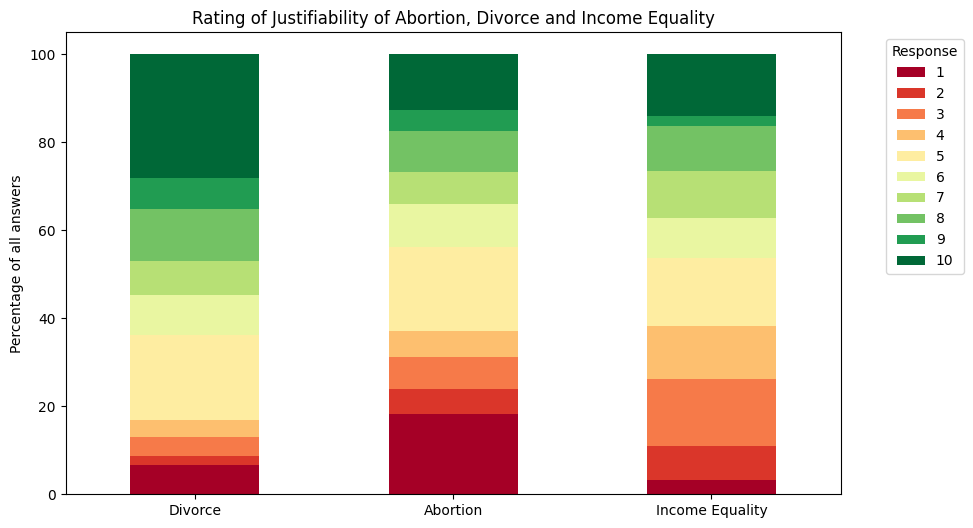

In [25]:
# stacked bar plots, ein plot pro country & frage, für alle waves

# germany only for fast testing
dfWVSger = subset[subset.country == 'Germany']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'], #choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Plot for '10_values' group
df_10_values = dfWVSger[grouped_variables['10_values']]
df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100) #normalize= true -> % instead of counting data points

# plot
ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
ax1.set_ylabel('Percentage of all answers')
#ax1.set_xlabel('Question')
ax1.set_title('Rating of Justifiability of Abortion, Divorce and Income Equality')

#TODO colourbar instead of legend maybr
#cax = plt.gcf().add_axes([0.92, 0.2, 0.02, 0.6])  # Adjust the position and size as needed
#plt.colorbar(ax1.patches, ticks=np.linspace(0, 100, 10))  # Adjust ticks as needed
#cbar = plt.colorbar(ax1)
#cbar.set_label('X+Y')

ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')#, labels={"Never justifiable", "2", "3", "4", "5", "6", "7", "8", "9", "Always Justifiable"})
# TODO labels
plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

Germany each wave

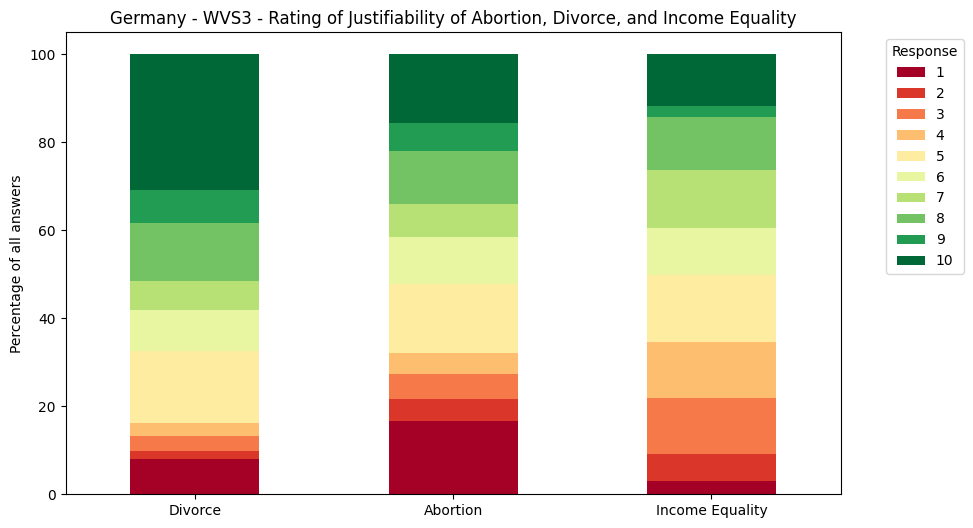

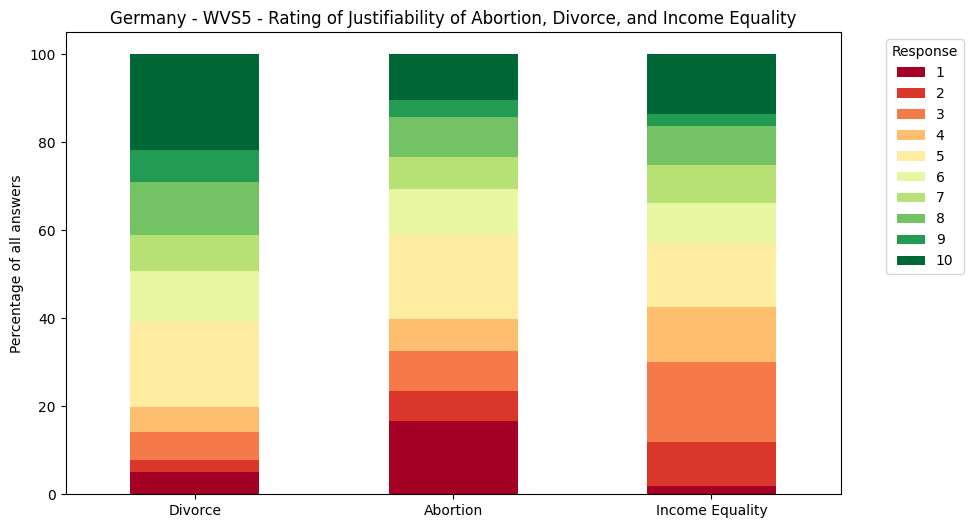

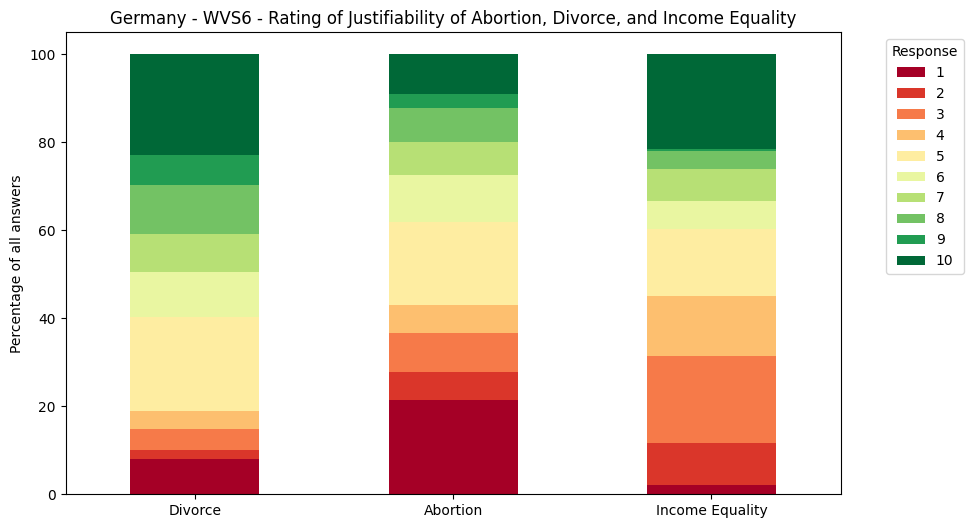

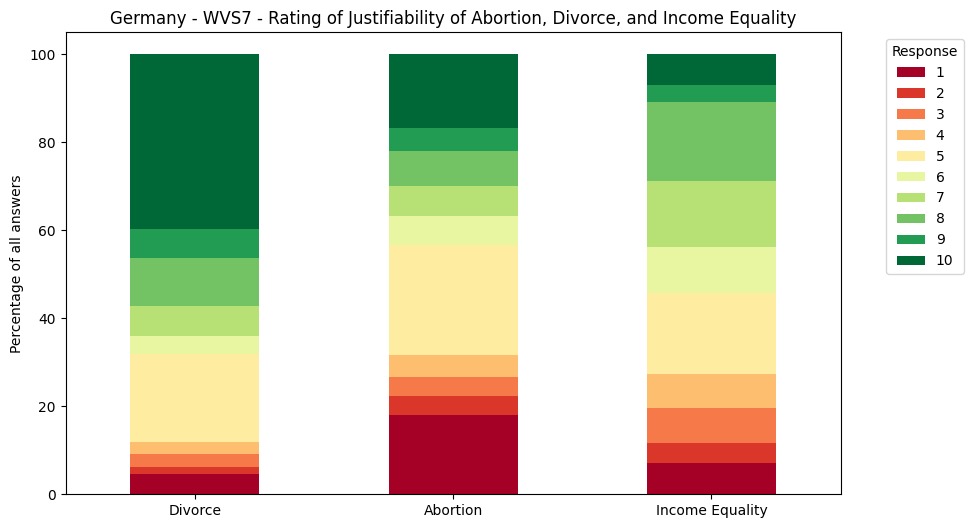

In [11]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Germany']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Germany - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


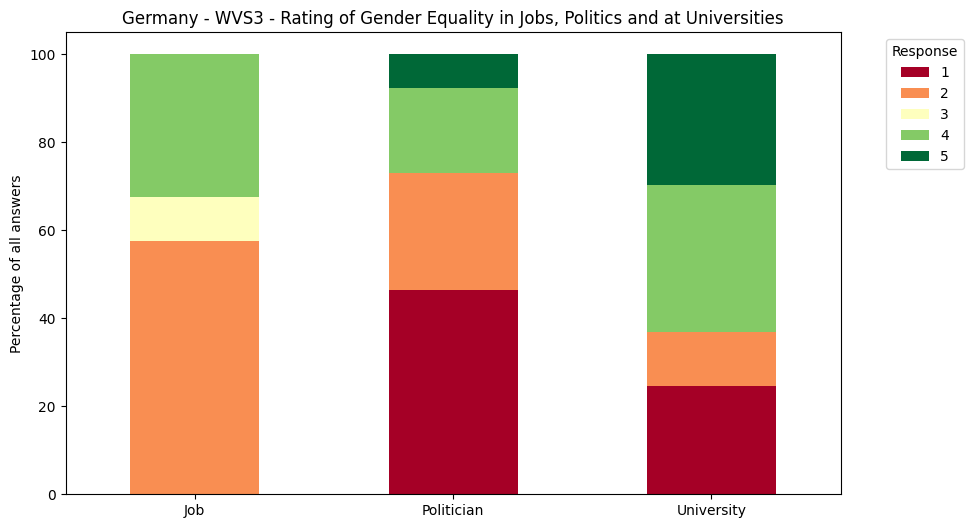

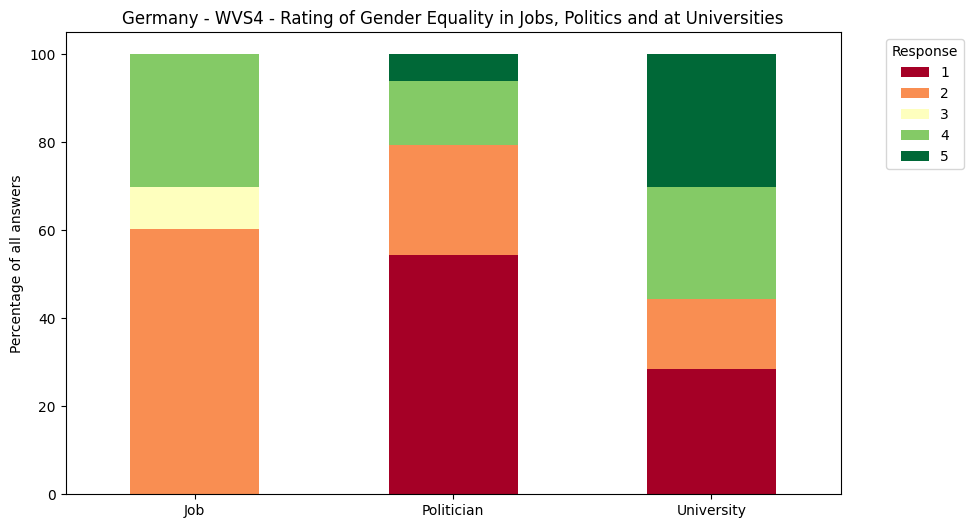

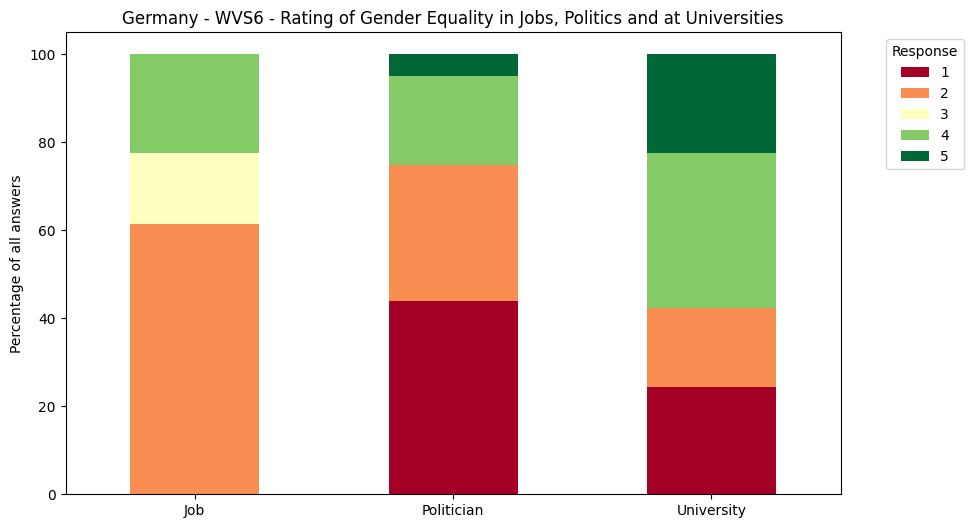

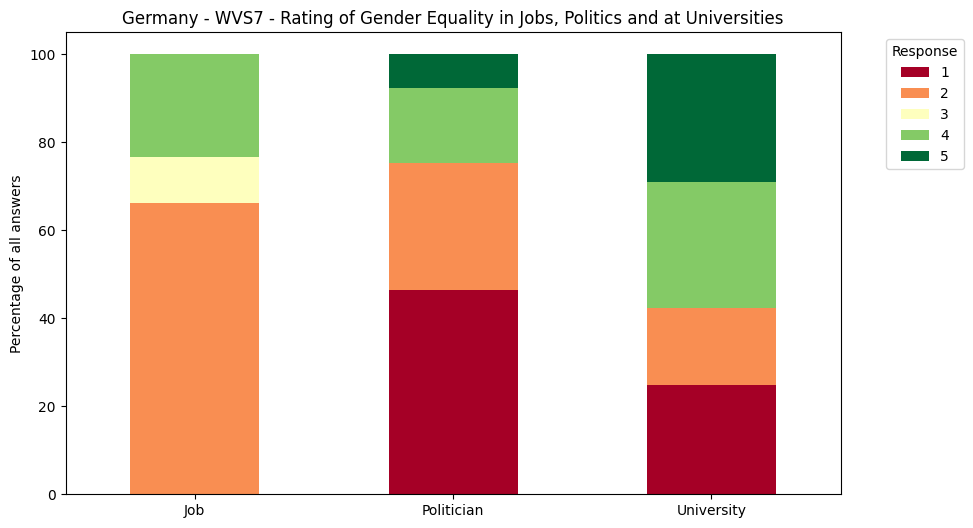

In [26]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Nigeria']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['5_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Germany - {wave} - Rating of Gender Equality in Jobs, Politics and at Universities')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Job", "Politician", "University"], rotation=0)

        # Show plot for each wave
        plt.show()

China each wave

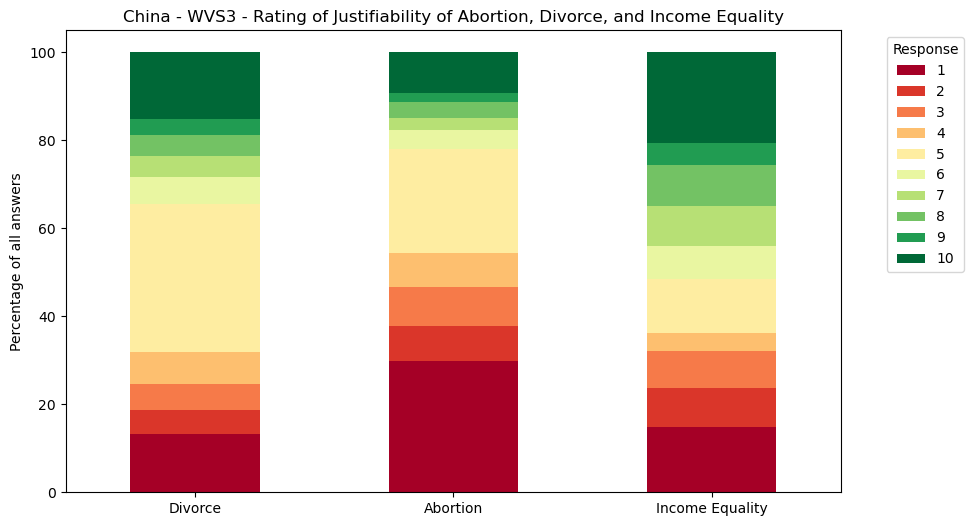

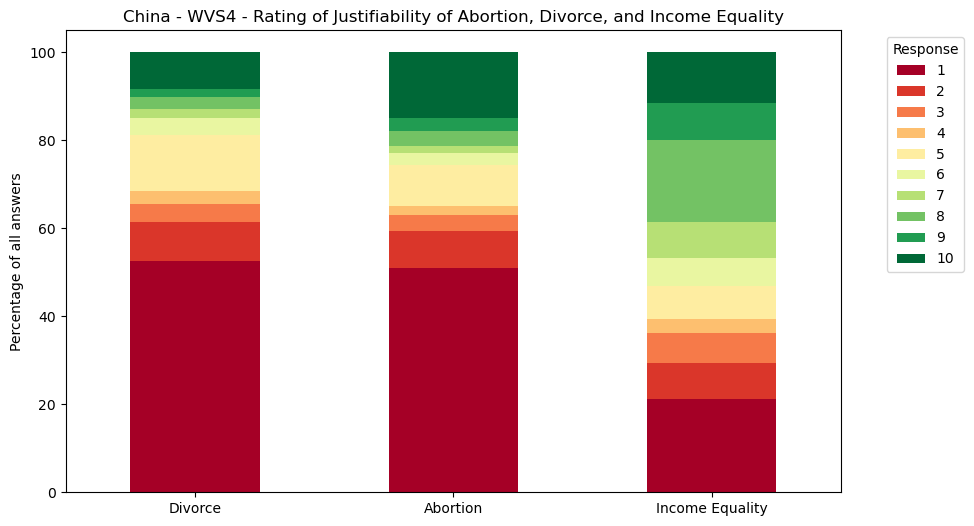

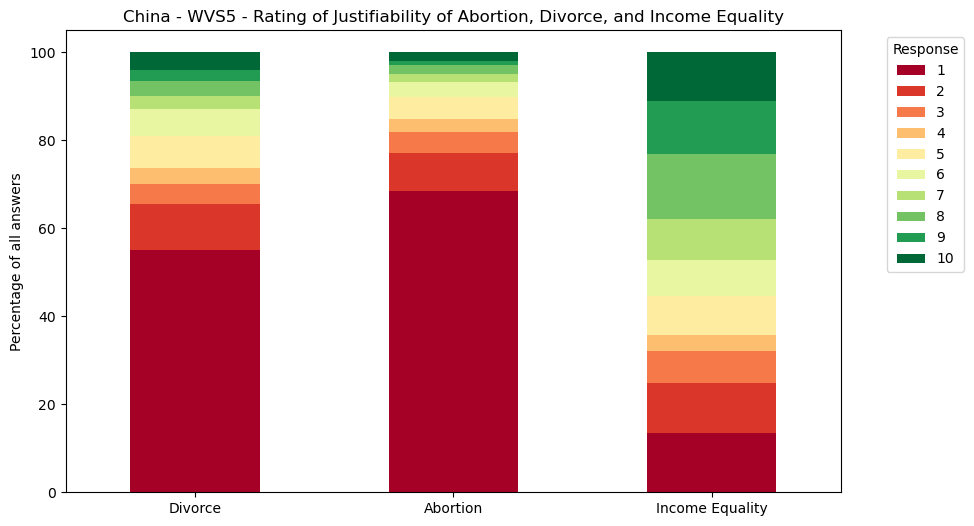

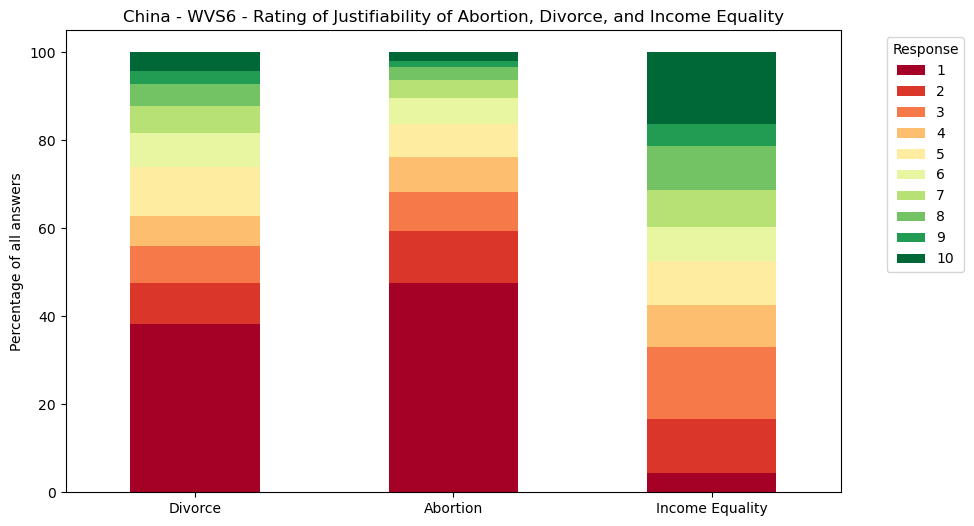

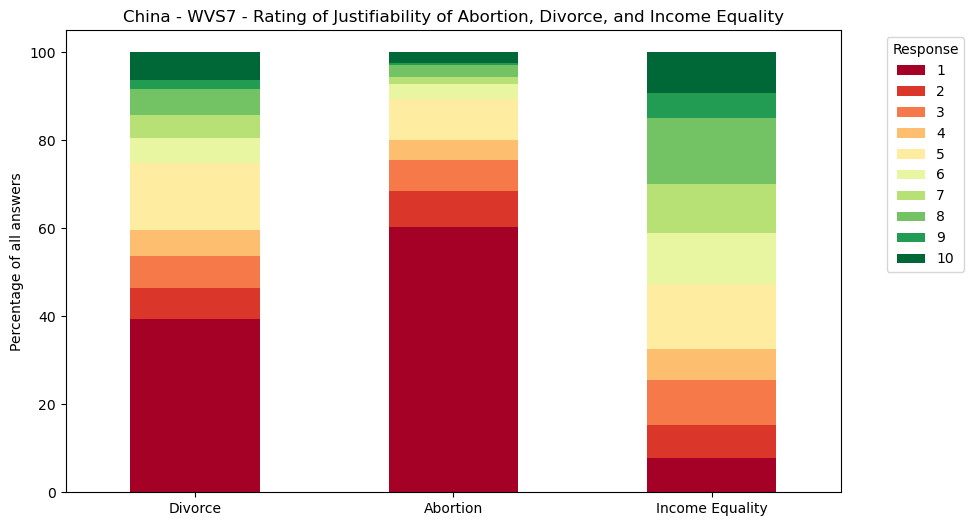

In [53]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'China']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'China - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


Turkey each wave

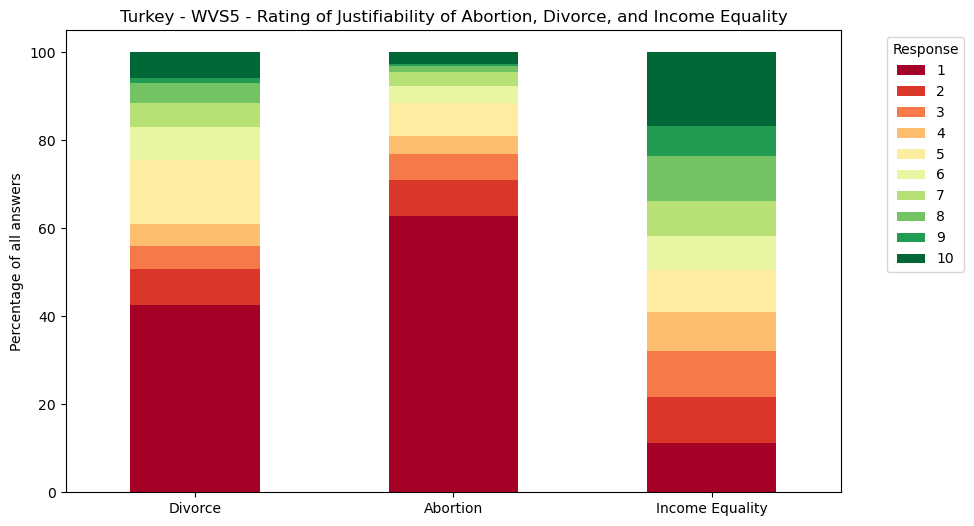

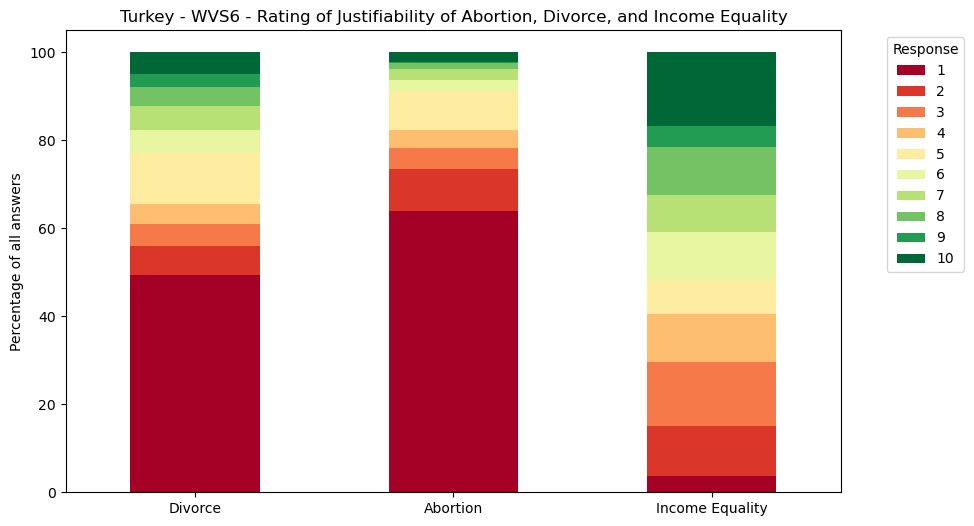

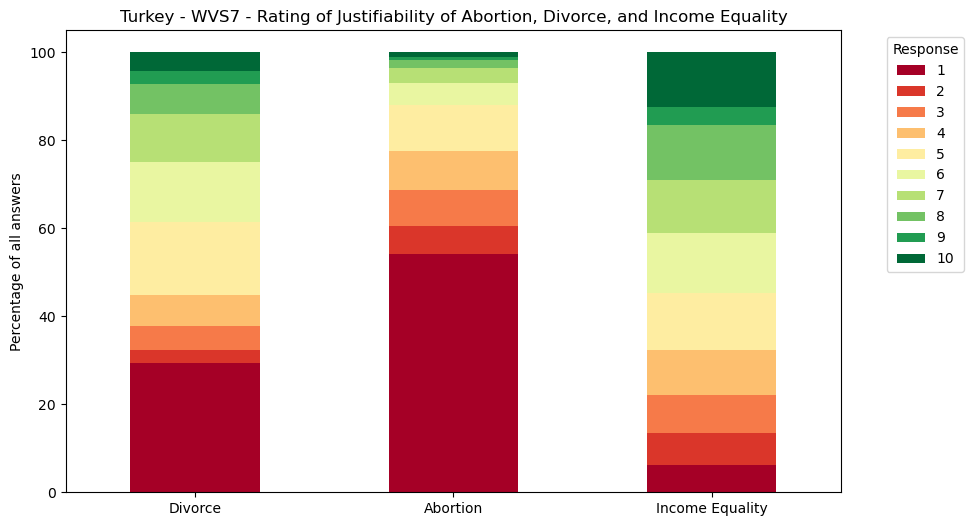

In [54]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Turkey']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Turkey - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


Nigeria each wave

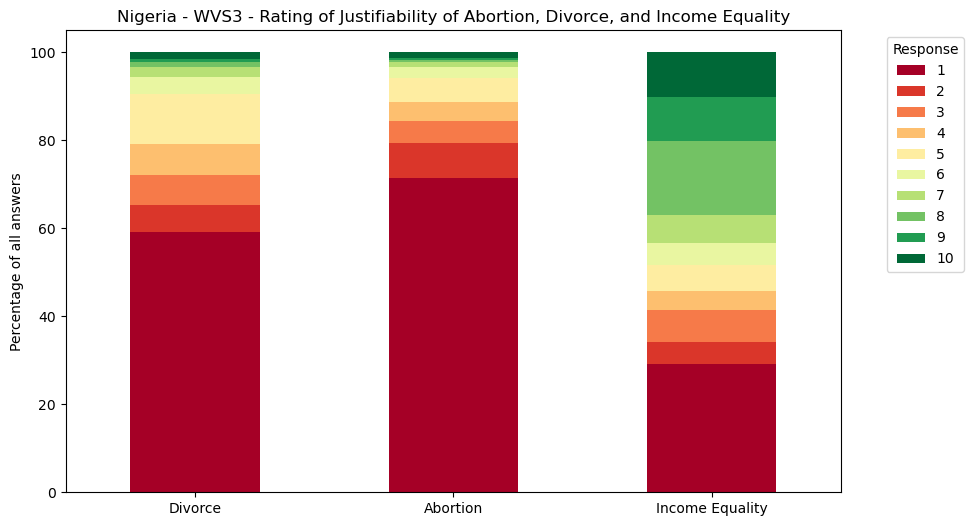

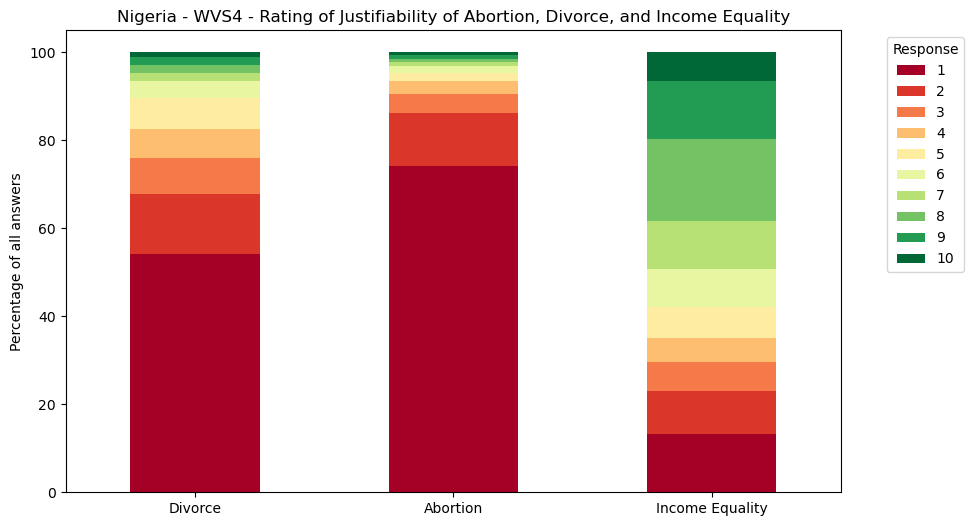

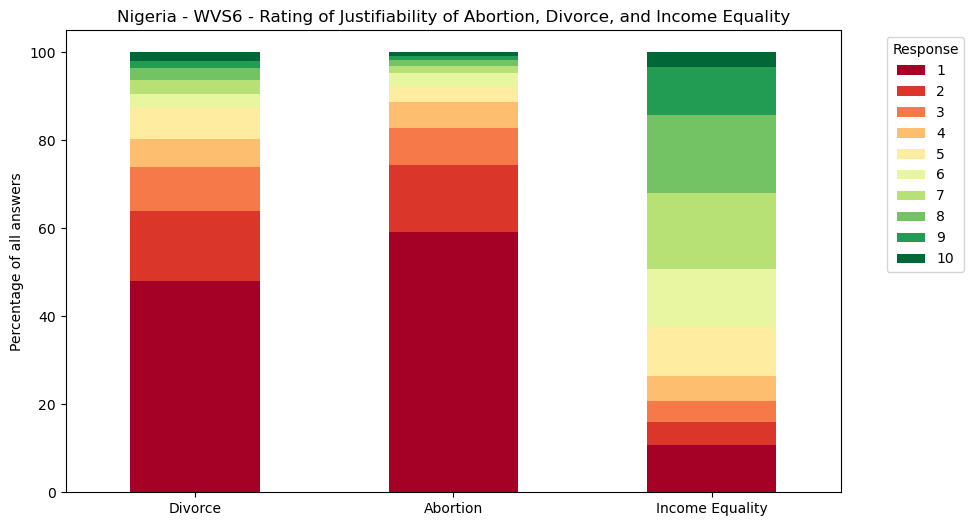

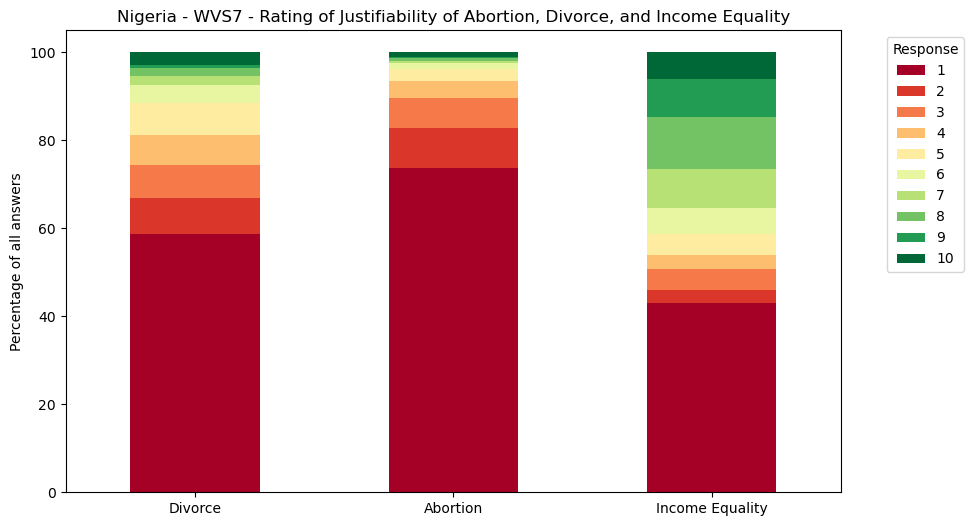

In [55]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Nigeria']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Nigeria - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


Peru each wave

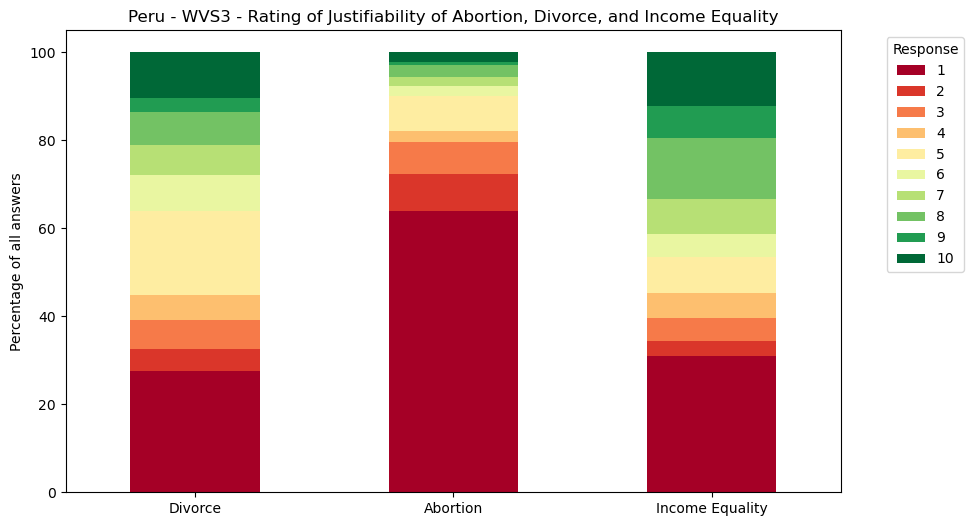

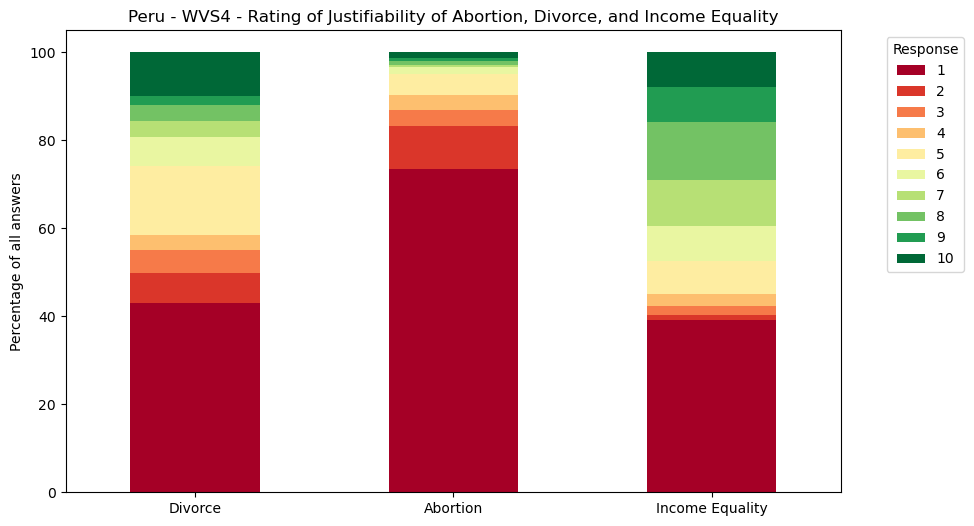

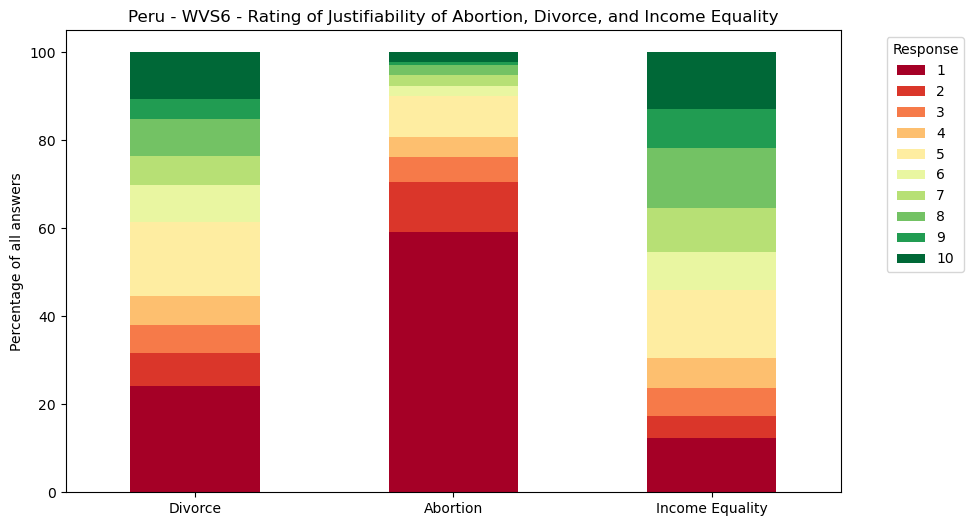

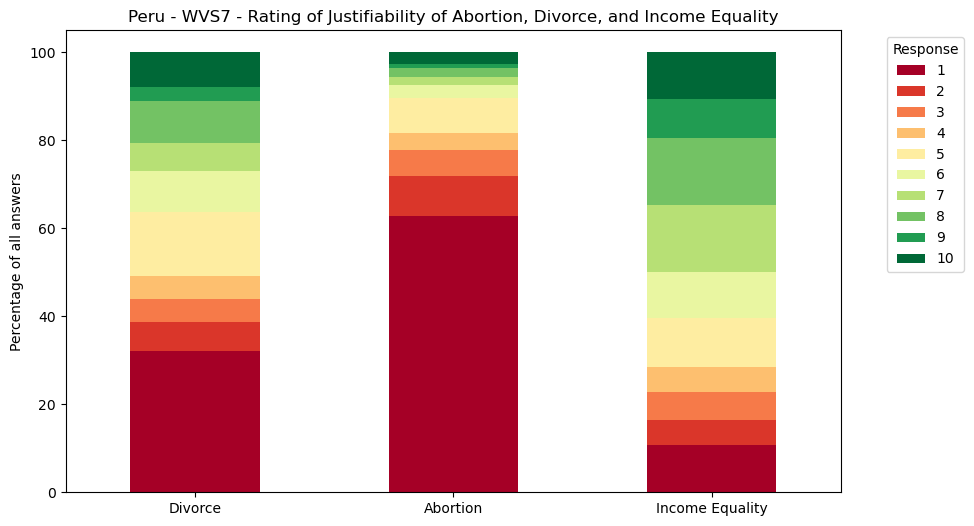

In [56]:

listWaves = ['WVS3', 'WVS4', 'WVS5', 'WVS6', 'WVS7']

# Variables grouped by the number of possible values
grouped_variables = {
    '10_values': ['divorce', 'abortion', 'income_equality'],  # choice_control
    '5_values': ['job', 'politician', 'university'],
    '4_values': ['women_movement']
}

# Subset the DataFrame for Germany
dfWVSgermany = subset[subset.country == 'Peru']

for wave in listWaves:
    # Subset the DataFrame for the current wave
    dfWVSwave = dfWVSgermany[dfWVSgermany.wave == wave]
    
    if not dfWVSwave.empty:
    # Plot for '10_values' group
        df_10_values = dfWVSwave[grouped_variables['10_values']]
        df_percentage_10_values = df_10_values.apply(lambda x: x.value_counts(normalize=True) * 100)

        # Plot
        ax1 = df_percentage_10_values.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlGn')
        ax1.set_ylabel('Percentage of all answers')
        ax1.set_title(f'Peru - {wave} - Rating of Justifiability of Abortion, Divorce, and Income Equality')

        
        # Legend and labels
        ax1.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(np.arange(3), ["Divorce", "Abortion", "Income Equality"], rotation=0)

        # Show plot for each wave
        plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

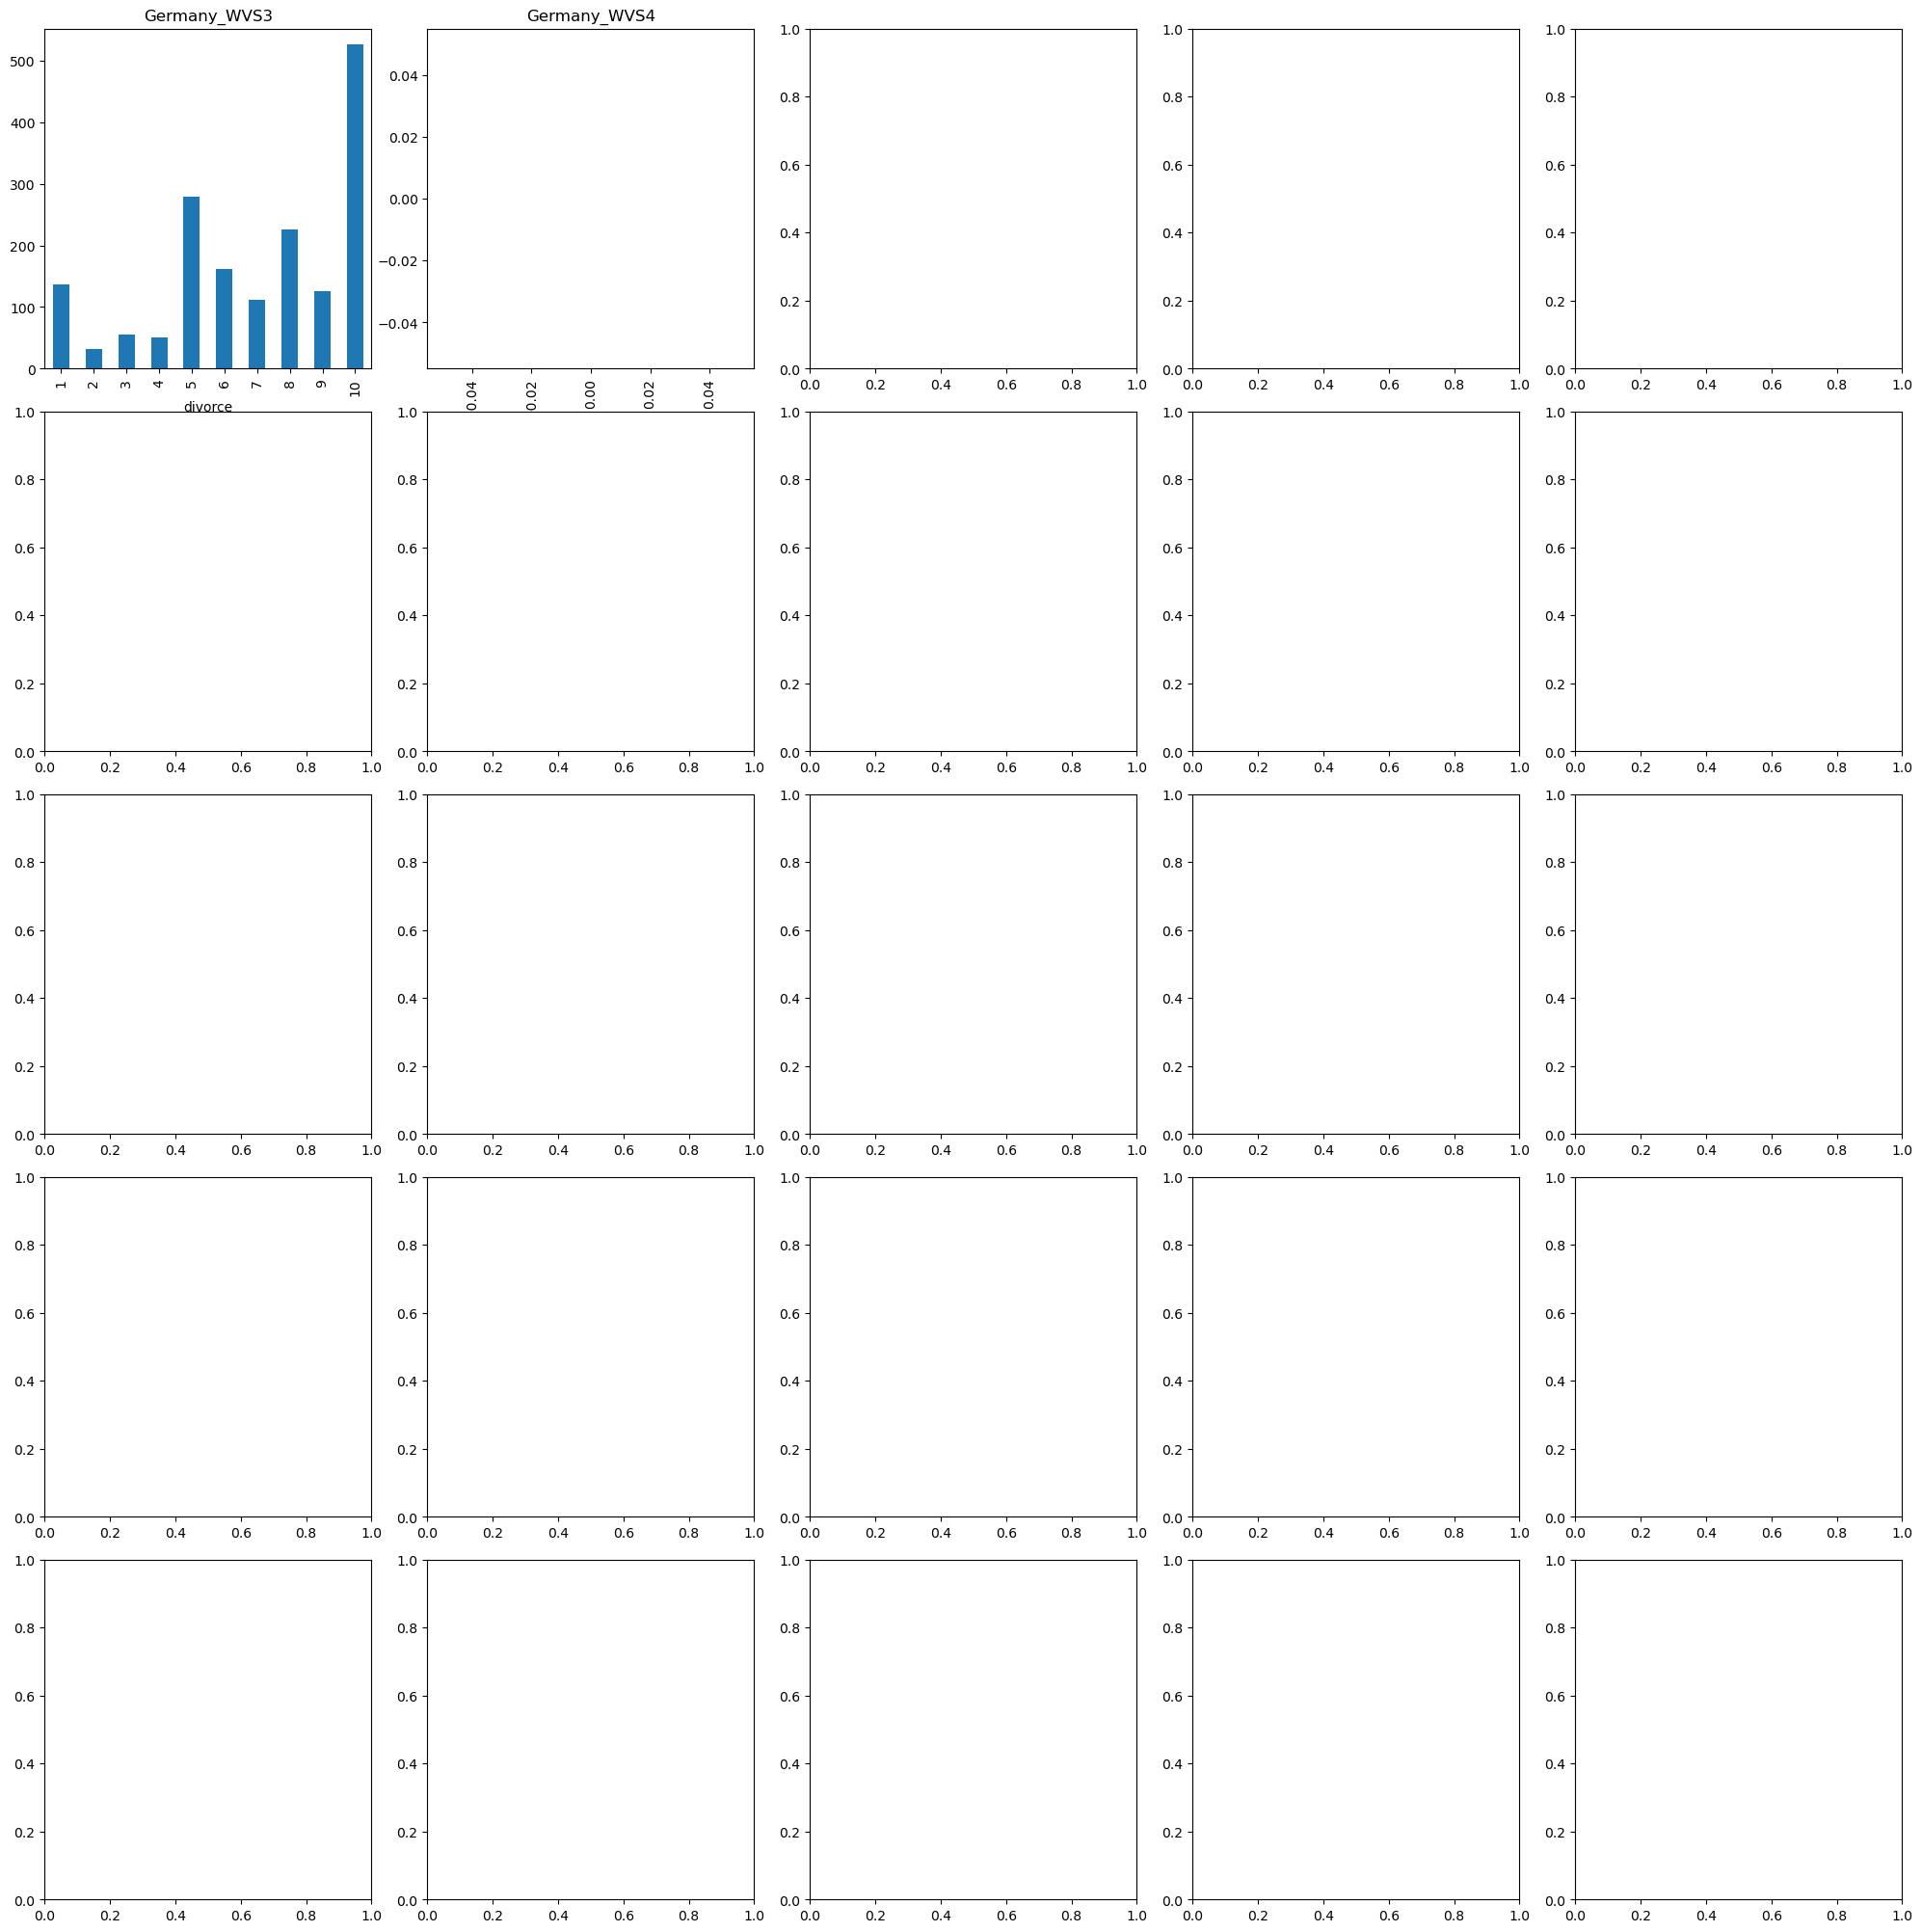

In [30]:
fig, axs = plt.subplots(len(listCountries),len(listWaves),figsize=(20, 20))
plt.tight_layout()

for idxCountry, country in enumerate(listCountries):
    for idxwave, wave in enumerate(listWaves):
        #if wave=="WVS5" and country=="Nigeria":
        #    continue
        dfTemp = dfWVSFilterd[(dfWVSFilterd.country==country)&(dfWVSFilterd.wave==wave)]
        dfTemp['divorce'].value_counts().sort_index().plot(ax=axs[idxCountry,idxwave], title=country+"_"+wave, kind='bar')

In [ ]:
#definitions
def categoriesToInteger():
#mean, std
def plotOneMean():
#distribution
def plotOneDistribution():

In [ ]:
#examples

In [ ]:
#definitions
#one country, all waves, one question
#trajectories
#multiple distributions

In [ ]:
#examples

In [ ]:
#definitions
#all countrys, one wave, one question

In [ ]:
#examples

In [ ]:
#WGV-Score?